## Importing all necessary libararies

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

# Loading the data

In [78]:
df = pd.read_csv("ab_data.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


## Data cleaning

In [61]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [62]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [63]:
df = df.drop_duplicates(subset='user_id')

## Diving data into two groups

In [64]:
control = df[df['group'] == 'control']
treatment = df[df['group'] == 'treatment']

control_rate = control['converted'].mean()
treatment_rate = treatment['converted'].mean()

print(f"Control conversion rate: {control_rate:.4f}")
print(f"Treatment conversion rate: {treatment_rate:.4f}")

Control conversion rate: 0.1203
Treatment conversion rate: 0.1188


## Calculating z-score and p-value

In [65]:
convert = [treatment['converted'].sum(), control['converted'].sum()]
n = [len(treatment), len(control)]

# Z-test
z_score, p_value = sm.stats.proportions_ztest(convert, n)
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.2f}")

Z-Score: -1.21
P-Value: 0.23


## Interpret the results

In [66]:
if p_value < 0.05:
    print("Reject the null hypothesis — significant difference detected.")
else:
    print("Fail to reject the null hypothesis — no significant difference.")

Fail to reject the null hypothesis — no significant difference.


## Visualize the results

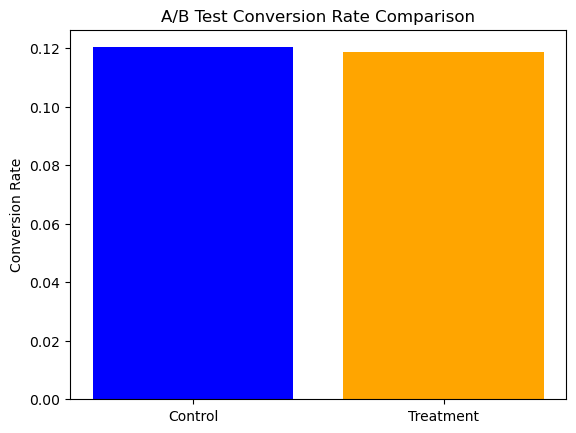

In [67]:
plt.bar(['Control', 'Treatment'], [control_rate, treatment_rate], color=['blue', 'orange'])
plt.ylabel('Conversion Rate')
plt.title('A/B Test Conversion Rate Comparison')
plt.show()